<a href="https://colab.research.google.com/github/Shivani11032006/DA-Projects/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")

The objective of this analysis is to identify key factors influencing heart disease and understand how age, sex, chest pain type, cholesterol, blood pressure, and exercise-induced angina impact disease occurrence

In [47]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [48]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [50]:
df.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [52]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
265,False
266,False
267,False
268,False


<Axes: xlabel='Heart Disease'>

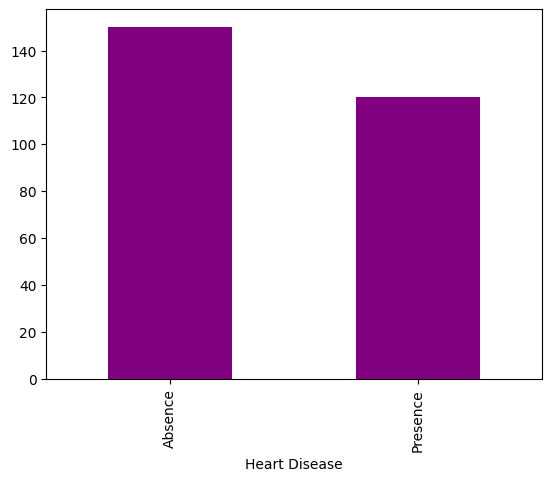

In [53]:
df['Heart Disease'].value_counts().plot(kind='bar',color='purple') #Heart Disease Distribution

<Axes: xlabel='Sex', ylabel='count'>

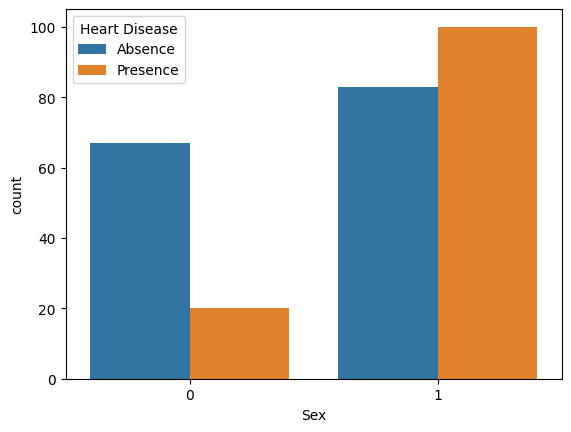

In [54]:
sns.countplot(x='Sex', hue='Heart Disease', data=df)


<Axes: xlabel='Heart Disease', ylabel='Age'>

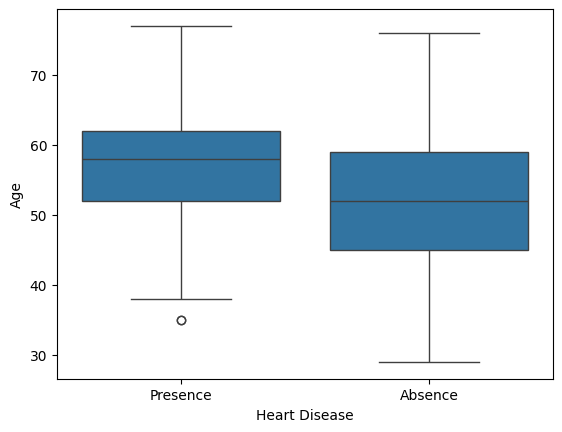

In [55]:
sns.boxplot(x='Heart Disease', y='Age', data=df)


Target Variable: target (0 = No disease, 1 = Disease)

Type: Binary classification variable

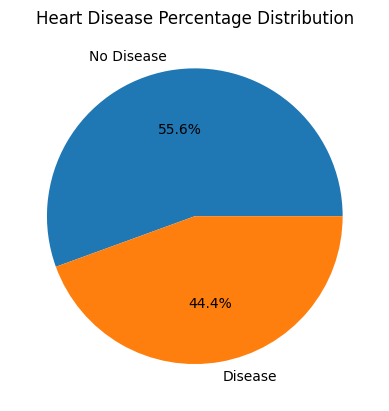

In [56]:
hd_counts = df['Heart Disease'].value_counts()

plt.pie(hd_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%')
plt.title("Heart Disease Percentage Distribution")
plt.show()


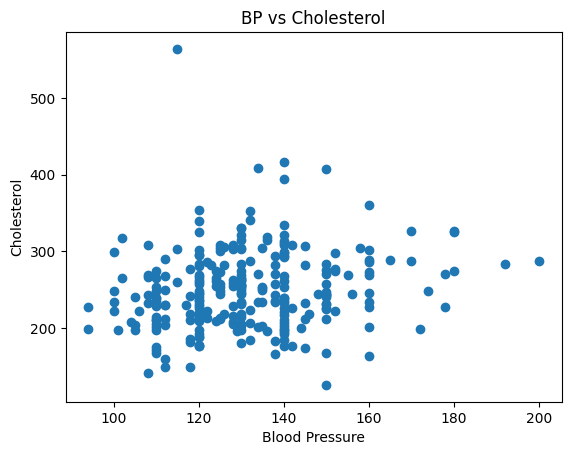

In [57]:
plt.scatter(df['BP'], df['Cholesterol'])
plt.title("BP vs Cholesterol")
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.show()


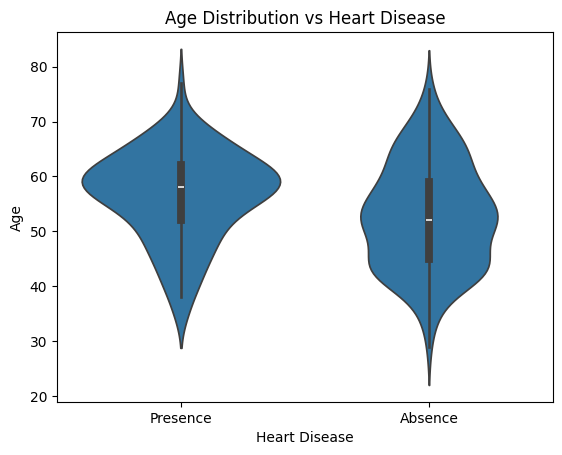

In [58]:
sns.violinplot(x='Heart Disease', y='Age', data=df)
plt.title("Age Distribution vs Heart Disease")
plt.show()


In [59]:
avg_age_hd = df.groupby('Heart Disease')['Age'].mean()

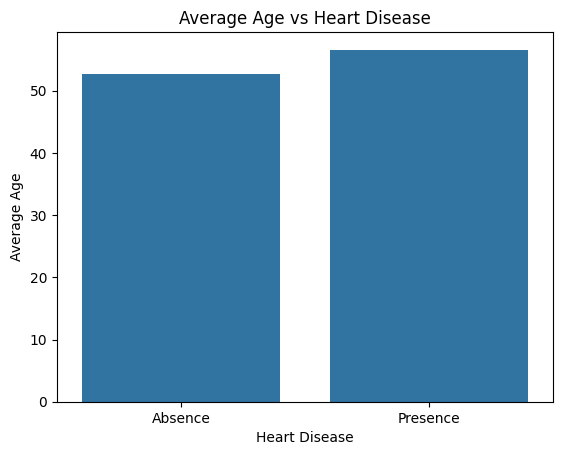

In [60]:
sns.barplot(x=avg_age_hd.index, y=avg_age_hd.values)
plt.title("Average Age vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Average Age")
plt.show()

In [61]:
cp_hd = pd.crosstab(df["Chest pain type"], df["Heart Disease"])

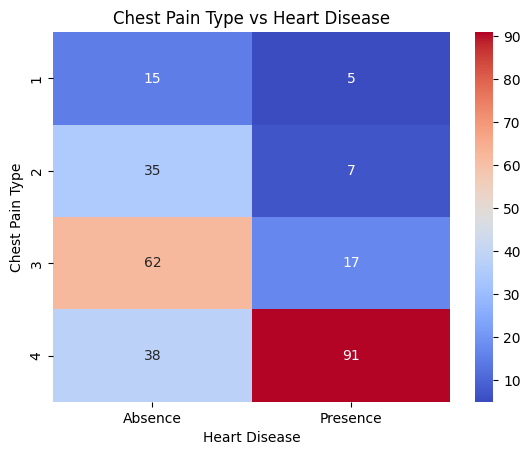

In [62]:
sns.heatmap(cp_hd, annot=True, cmap="coolwarm")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Chest Pain Type")
plt.show()

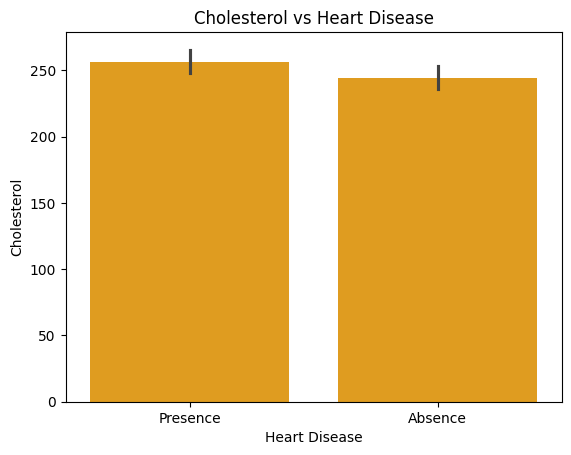

In [63]:
sns.barplot(x="Heart Disease", y="Cholesterol", data=df,color="orange")
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")
plt.show()

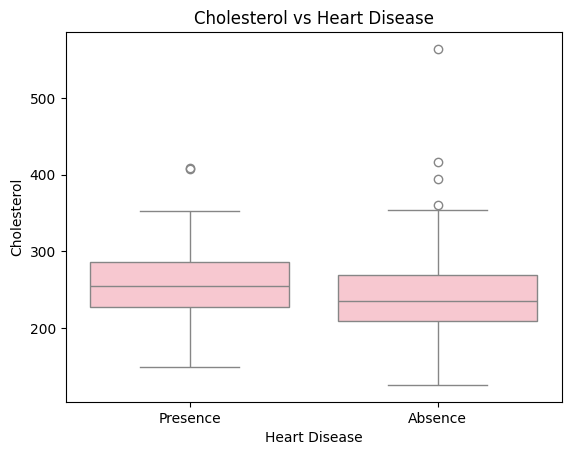

In [64]:
sns.boxplot(x="Heart Disease", y="Cholesterol", data=df,color="pink")
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")
plt.show()

<Figure size 640x480 with 0 Axes>

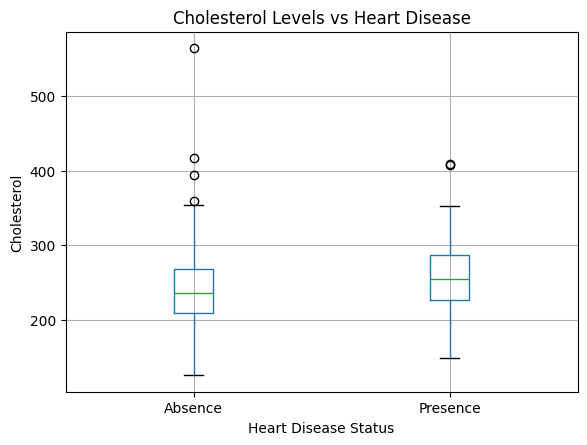

In [65]:
plt.figure()
df.boxplot(column="Cholesterol", by="Heart Disease")
plt.title("Cholesterol Levels vs Heart Disease")
plt.suptitle("")
plt.xlabel("Heart Disease Status")
plt.ylabel("Cholesterol")
plt.show()

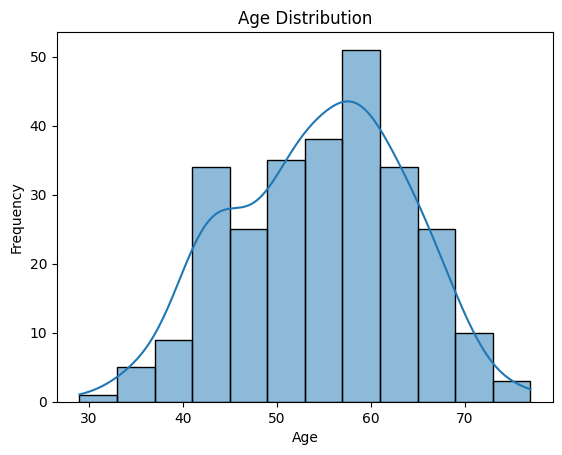

In [66]:
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [67]:
sex_hd = pd.crosstab(df["Sex"], df["Heart Disease"])

<Figure size 640x480 with 0 Axes>

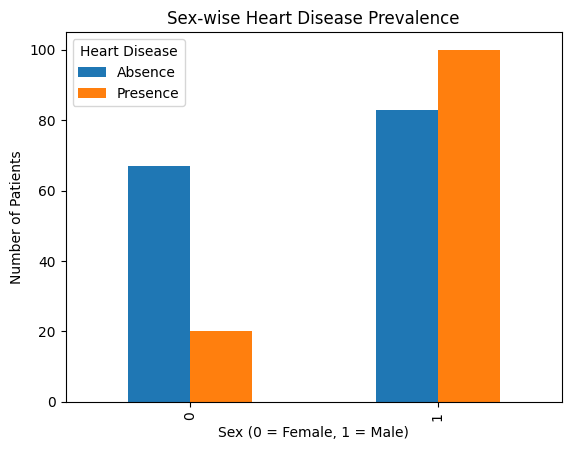

In [68]:
plt.figure()
sex_hd.plot(kind="bar")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Number of Patients")
plt.title("Sex-wise Heart Disease Prevalence")
plt.legend(title="Heart Disease")
plt.show()

In [69]:
angina_hd = pd.crosstab(df["Exercise angina"], df["Heart Disease"])

<Figure size 640x480 with 0 Axes>

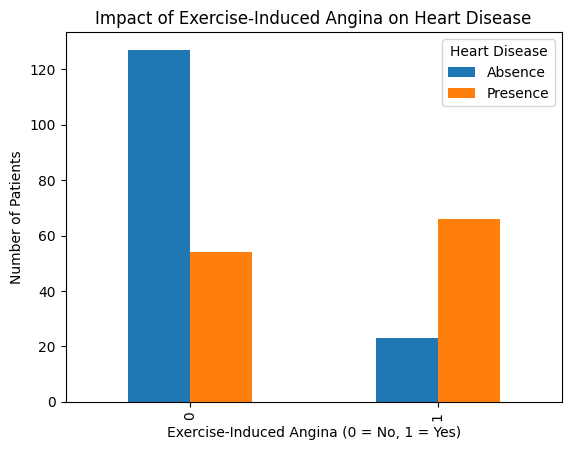

In [70]:
plt.figure()
angina_hd.plot(kind="bar")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.title("Impact of Exercise-Induced Angina on Heart Disease")
plt.legend(title="Heart Disease")
plt.show()

Patients with heart disease tend to be older

Peak density shifts toward higher age values for disease cases

Age is a significant risk factor

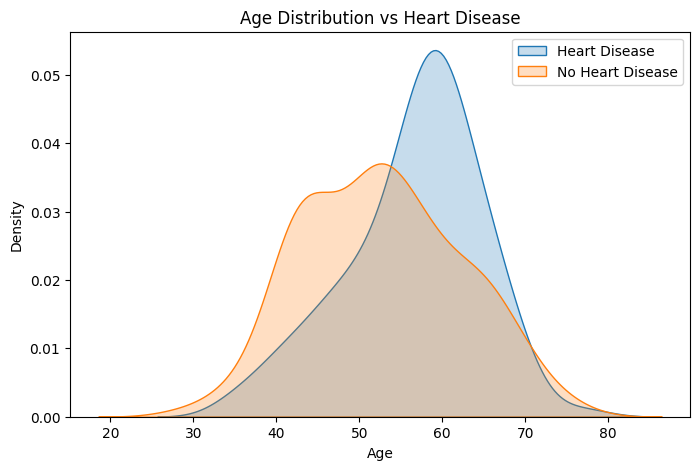

In [71]:
plt.figure(figsize=(8,5))

sns.kdeplot(df[df['Heart Disease'] == 'Presence']['Age'], label='Heart Disease', fill=True)
sns.kdeplot(df[df['Heart Disease'] == 'Absence']['Age'], label='No Heart Disease', fill=True)

plt.title('Age Distribution vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

Certain chest pain types (especially asymptomatic) show higher disease proportion

Chest pain type is a strong predictor

Helps doctors prioritize risk levels

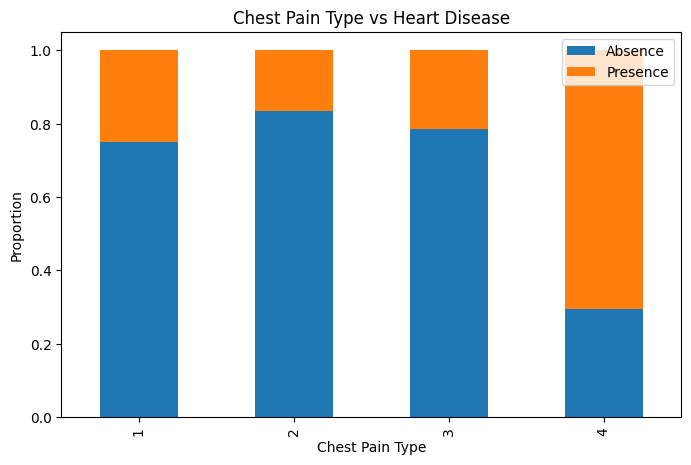

In [72]:
cp_target = pd.crosstab(df['Chest pain type'], df['Heart Disease'], normalize='index')

cp_target.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion')
plt.legend(['Absence', 'Presence'])
plt.show()

Median BP is slightly higher in heart disease patients

Large overlap indicates BP alone is not sufficient to predict disease

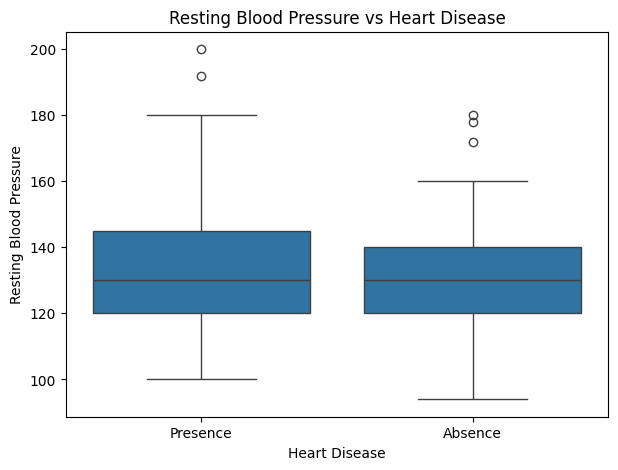

In [73]:
plt.figure(figsize=(7,5))

sns.boxplot(x='Heart Disease', y='BP', data=df)

plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

From the analysis, chest pain type, exercise-induced angina, age, and sex show strong association with heart disease. Cholesterol and blood pressure show variability but weaker correlation. These findings can assist in early risk identification.The analysis shows that age, chest pain type, and resting blood pressure have varying influence on heart disease. Age and chest pain type show strong association, while blood pressure shows moderate variability. Combining multiple features gives better predictive insight.